## Read RGB

In [ ]:
from PIL import Image
import numpy as np

img  =  Image.open("pics/5.jpg")
img_np =  np.asarray(img)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
img_np.shape

(3024, 4032, 3)

In [ ]:
w, h = img.size
compress_rate = 0.05
img_resize = img.resize((100, 100))

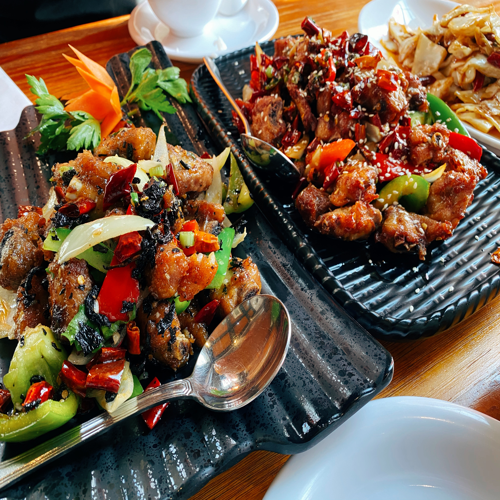

In [ ]:
img.resize((500, 500))

In [ ]:
img_resize_np =  np.asarray(img_resize)
img_resize_np.shape

(100, 100, 3)

In [ ]:
img_np[0][0]

array([4, 5, 9], dtype=uint8)

In [ ]:
img_resize_np[0][0]

array([3, 5, 9], dtype=uint8)

## Get DMC info

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
import pandas as pd
import csv
import re

with open('DMC_RGB.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    rows = [row for row in reader]

In [ ]:
pattern = re.compile(r".*<td>(.*?)</td>")
data_all = []
for line in rows:
    content = ''.join(line)
    if re.match(r"(.*)<td>(.*?)</td>", content):
        data = re.search(pattern, content)
        data_all.append(data.group(1))

In [ ]:
floss = data_all[::7]
name = data_all[1::7]
Red = data_all[2::7]
Green = data_all[3::7]
Blue = data_all[4::7]
RGB_code = data_all[5::7]
row = data_all[6::7]

In [ ]:
dmc_rgb = {"floss": floss,\
"name": name, \
"Red": list(map(int,Red)), \
"Green": list(map(int,Green)), \
"Blue": list(map(int,Blue)), \
"RGB_code": RGB_code, \
"row": row}
dmc_rgb = pd.DataFrame(dmc_rgb)

In [ ]:
dmc_rgb.head(10)

,floss,name,Red,Green,Blue,RGB_code,row
0,3713,Salmon Very Light,255,226,226,FFE2E2,row 01-01
1,761,Salmon Light,255,201,201,FFC9C9,row 01-02
2,760,Salmon,245,173,173,F5ADAD,row 01-03
3,3712,Salmon Medium,241,135,135,F18787,row 01-04
4,3328,Salmon Dark,227,109,109,E36D6D,row 01-05
5,347,Salmon Very Dark,191,45,45,BF2D2D,row 01-06
6,353,Peach,254,215,204,FED7CC,row 01-07
7,352,Coral Light,253,156,151,FD9C97,row 01-08
8,351,Coral,233,106,103,E96A67,row 01-09
9,350,Coral Medium,224,72,72,E04848,row 01-10


In [ ]:
rgb_matrix = dmc_rgb[["Red","Green","Blue"]]
rgb_matrix

,Red,Green,Blue
0,255,226,226
1,255,201,201
2,245,173,173
3,241,135,135
4,227,109,109
...,...,...,...
449,132,132,132
450,108,108,108
451,86,86,86
452,66,66,66


## Generate palette

In [ ]:
img_resize_np = np.load("try.npy")

In [ ]:
img_resize_np.shape

(64, 64, 3)

In [ ]:
col_num = img_resize_np.shape[0]
row_num = img_resize_np.shape[1]
palette_num = rgb_matrix.shape[0]

In [ ]:
rgb_count = []
for i in range(palette_num):
    c_i = np.array(rgb_matrix.loc[i])
    n_i = 0
    for row in range(row_num):
        for col in range(col_num):
            x = img_resize_np[row][col]
            dist = np.linalg.norm(x - c_i)
            if dist <= 20:
                n_i += 1
    rgb_count.append(n_i)

In [ ]:
rgb_palette = dmc_rgb.copy()
rgb_palette["count"] = rgb_count
rgb_palette

,floss,name,Red,Green,Blue,RGB_code,row,count
0,3713,Salmon Very Light,255,226,226,FFE2E2,row 01-01,0
1,761,Salmon Light,255,201,201,FFC9C9,row 01-02,0
2,760,Salmon,245,173,173,F5ADAD,row 01-03,0
3,3712,Salmon Medium,241,135,135,F18787,row 01-04,0
4,3328,Salmon Dark,227,109,109,E36D6D,row 01-05,0
...,...,...,...,...,...,...,...,...
449,169,Pewter Light,132,132,132,848484,row 19-12,4
450,317,Pewter Gray,108,108,108,6C6C6C,row 19-13,16
451,413,Pewter Gray Dark,86,86,86,565656,row 19-14,16
452,3799,Pewter Gray Vy Dk,66,66,66,424242,row 19-15,36


In [ ]:
rgb_sorted = rgb_palette.sort_values(by = ["count"], ascending = False)
rgb_init = rgb_sorted.head(100).reset_index()

In [ ]:
rgb_init

,index,floss,name,Red,Green,Blue,RGB_code,row,count
0,320,444,Lemon Dark,255,214,0,FFD600,row 14-04,1115
1,319,973,Canary Bright,255,227,0,FFE300,row 14-03,819
2,407,3371,Black Brown,30,17,8,1E1108,row 17-18,214
3,236,3347,Yellow Green Med,113,147,92,71935C,row 10-22,164
4,249,904,Parrot Green V Dk,85,120,34,557822,row 11-10,118
...,...,...,...,...,...,...,...,...,...
95,108,155,Blue Violet Med Dark,152,145,182,9891B6,row 05-16,4
96,159,930,Antique Blue Dark,69,92,113,455C71,row 07-20,4
97,207,3815,Celadon Green Dk,71,119,89,477759,row 09-20,4
98,270,166,Moss Green Md Lt,192,200,64,C0C840,row 12-06,4


In [ ]:
initial_palette = []
Selected = [0] * 100
initial_palette.append(0)
Selected[0] = 1
initn = rgb_init["count"]
K = 50
Cno = 1

In [ ]:
import math as m

In [ ]:
def cal_distN(i,palette,rgb_df,initn):
    rgb = rgb_df[["Red","Green","Blue"]]
    colour_palette = np.array(rgb.iloc[palette])
    c_i = np.array(rgb.iloc[i])
    all_dist = list(map(lambda x: np.linalg.norm(x - c_i), colour_palette))
    Dist_i = min(all_dist) ** 2
    distN = Dist_i * m.sqrt(initn[i])
    return distN

In [ ]:
while Cno < K:
    not_selected = []
    for i in range(100):
        if Selected[i] == 0:
            not_selected.append(i)
    all_distN = list(map(lambda x: cal_distN(x,initial_palette,rgb_init,initn), not_selected))
    which_max = all_distN.index(max(all_distN))
    j = not_selected[which_max]
    initial_palette.append(j)
    Selected[j] = 1
    Cno += 1

In [ ]:
final_palette = rgb_init.iloc[initial_palette].reset_index()

In [ ]:
final_palette

,level_0,index,floss,name,Red,Green,Blue,RGB_code,row,count
0,0,320,444,Lemon Dark,255,214,0,FFD600,row 14-04,1115
1,2,407,3371,Black Brown,30,17,8,1E1108,row 17-18,214
2,20,169,747,Peacock Blue Vy Lt,229,252,253,E5FCFD,row 08-09,41
3,3,236,3347,Yellow Green Med,113,147,92,71935C,row 10-22,164
4,30,157,932,Antique Blue Light,162,181,198,A2B5C6,row 07-18,28
5,11,233,986,Forest Green Vy Dk,64,82,48,405230,row 10-19,67
6,42,311,680,Old Gold Dark,188,141,14,BC8D0E,row 13-22,21
7,44,353,918,Red?Copper Dark,130,52,10,82340A,row 15-11,20
8,15,248,905,Parrot Green Dk,98,138,40,628A28,row 11-09,57
9,6,230,989,Forest Green,141,166,117,8DA675,row 10-16,108


## Find closest colour

In [ ]:
img_converted_np = img_resize_np.copy()

In [ ]:
for row in range(row_num):
    for col in range(col_num):
        c = img_resize_np[row][col]
        all_dist = list(map(lambda x: np.linalg.norm(x - c), np.array(final_palette[["Red","Green","Blue"]])))
        which_min = all_dist.index(min(all_dist))
        change = np.array(final_palette[["Red","Green","Blue"]].iloc[which_min])
        img_converted_np[row][col] = change

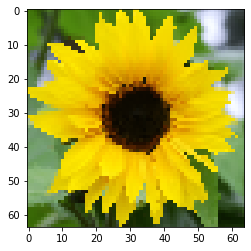

In [ ]:
plt.imshow(img_resize_np)

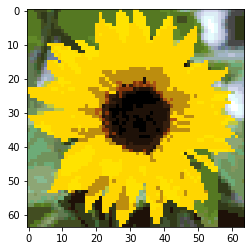

In [ ]:
plt.imshow(img_converted_np)

## Colour quantization?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image

In [ ]:
from sklearn.utils import shuffle

In [ ]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


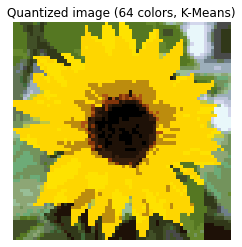

In [ ]:
n_colors = 25
img_converted_np2 = img_converted_np / 255
w, h, d = original_shape = tuple(img_converted_np2.shape)
assert d == 3
image_array = np.reshape(img_converted_np2, (w * h, d))
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=768076c7-65ce-42d5-b86d-074f9f75d785' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>